<a href="https://colab.research.google.com/github/Kunal1291/my-first-repository/blob/master/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTERNSHIP PROJECT BY KUNAL KISHORE

# 1.Importing the required libraries for EDA

In [1]:
#importing all the required libraries
# Object manipulation
import statistics
import numpy as np
import pandas as pd
from collections import defaultdict

# Plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns   

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


# 1.1 Loading the data into the data frame.

In [18]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [19]:
# To display the top 5 rows 
df.head(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [20]:
 # To display the botton 5 rows
df.tail(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# 1.2 Checking the types of data and basic summary stats

  Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [22]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [23]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

## 2. Dropping irrelevant columns

This step is certainly needed in EDA because sometimes there would be columns that we never use and in such cases dropping is useful. In this case, the columns such as Engine Fuel Type and Number of doors maynot be very relevant.

In [24]:
df = df.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# 3. Renaming the columns
Sometimes, column names can be confusing or not readable, so its a good practice to rename column names as it improves the readability of the data set

In [25]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(6)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200


# 4. Dropping the duplicate rows
This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data, so here we remove all the duplicate value from the data-set.

In [26]:
df.shape

(11914, 13)

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (792, 13)


In [12]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [27]:
df.shape

(11914, 13)

# 4.1 Dropping the missing or null values.
This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not the best approach and generally people just replace the missing values with the mean or the average of that column. This helps in fine tuning the model performance as more the data, a model has the better it performs. But the objective of this project is to do EDA and its fine to drop missing values and also the number of missing values is small compared to the entire dataset

In [28]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [29]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make             11816
Model            11816
Year             11816
HP               11816
Cylinders        11816
Transmission     11816
Drive Mode       11816
Vehicle Size     11816
Vehicle Style    11816
MPG-H            11816
MPG-C            11816
Popularity       11816
Price            11816
dtype: int64

In [30]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# 5. Detecting Outliers
An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. To know more about handling outliers, here is a resource towards data science.

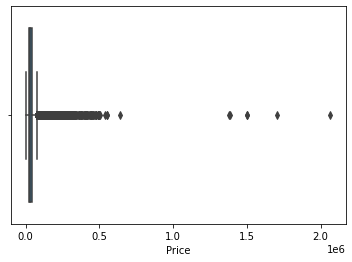

In [31]:
sns.boxplot(x=df['Price'])

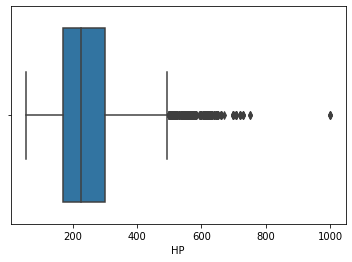

In [32]:
sns.boxplot(x=df['HP'])

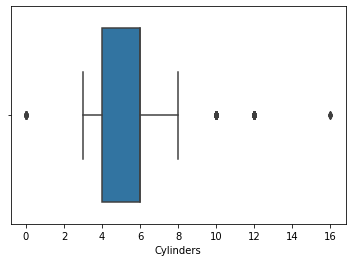

In [33]:
sns.boxplot(x=df['Cylinders'])

In [34]:
Q1 = df.quantile(0.45)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
print(IQR)

Year              3.0
HP              250.0
Cylinders         2.0
MPG-H            13.0
MPG-C            11.0
Popularity     4784.0
Price         79925.0
dtype: float64


In [35]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(7569, 13)

# 6. What are the most represented car brands ?

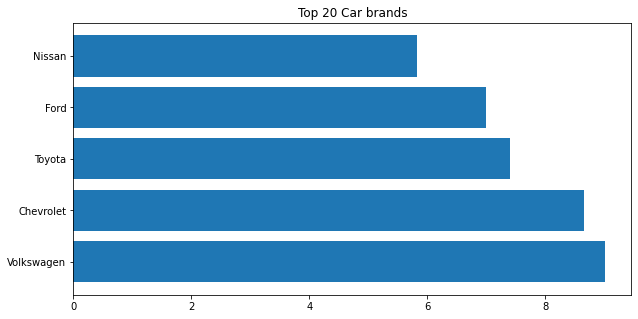

In [37]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 5 car brands
popular_labels = counts.index[:5]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:5])
plt.title('Top 20 Car brands')
plt.show()

In [38]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   36285.587786
Dodge       35386.523438
Ford        35050.158790
GMC         40043.561644
Honda       27843.544974
Mazda       25079.818182
Nissan      32150.646259
Toyota      33863.785714
Volkswagen  28895.417889


# 7.Correlation matrix

In [39]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.106888,-0.012267,0.107888,0.083634,0.153188,0.071037
HP,0.106888,1.000000,0.842300,-0.664276,-0.698259,0.075047,0.780327
Cylinders,-0.012267,0.842300,1.000000,-0.738907,-0.734442,0.101344,0.604231
MPG-H,0.107888,-0.664276,-0.738907,1.000000,0.915174,-0.085714,-0.413908
MPG-C,0.083634,-0.698259,-0.734442,0.915174,1.000000,-0.069164,-0.443741
Popularity,0.153188,0.075047,0.101344,-0.085714,-0.069164,1.000000,-0.010806
Price,0.071037,0.780327,0.604231,-0.413908,-0.443741,-0.010806,1.000000


# High correlation between

- Engine cylinders & Engine HP
- highway mpg & City mpg

The more cylinders there are, the more poverful the car is.

# High anticorrelation

- Engine cylinders & highway mpg

Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.

# 8.Exploratory Data Analysis

# Plot Heatmap

In [40]:
# Selecting only numerical features
list_numeric = list(df.describe().columns)

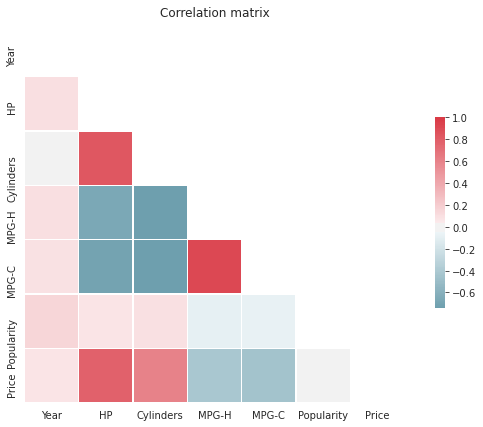

In [41]:
corr = df.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)

# return the indices for the upper triangle of an (n,m) array
mask[np.triu_indices_from(mask)] = True

# Plot
sns.set_style("white")
f, ax = plt.subplots(figsize=(11,7))
plt.title("Correlation matrix")
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, vmax = 1, center = 0, linewidths = .5, cbar_kws = {"shrink": .5})

plt.show()

# Scatterplot
We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line.

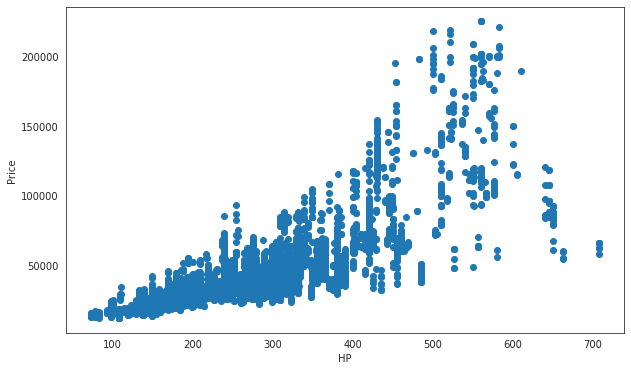

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

# Which Vehicle Style segment of cars sold the most.....

Text(0.5, 0, 'Body type')

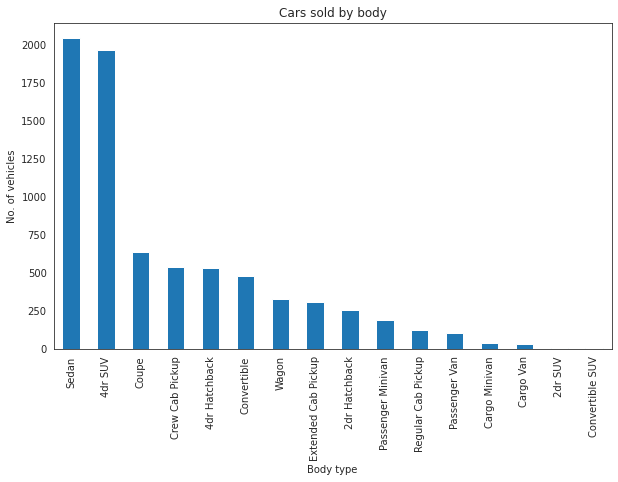

In [43]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))     # Bar chart for car 'body' variable
plt.title("Cars sold by body")
plt.ylabel('No. of vehicles')
plt.xlabel('Body type')

Here from the chart we can see that** sedan** cars were the most sold cars followed by 4dr SUV followed by Coupe and so on.....

Text(0.5, 0, 'Count of vehicles')

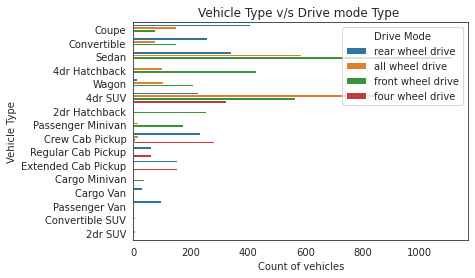

In [44]:
# Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style',data=df, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type ")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

# Making a New group "Price_group"

In [45]:
#create a new column 'Price group' and assign the value based on car price
df['price_group'] = pd.cut(df['Price'], [0,20000,30000,40000,50000,60000,100000],labels = ['<10k','10-29k','30-49k','50-69k','70-89k','>90k'],include_lowest = False)
df['price_group'] = df['price_group'].astype(object)

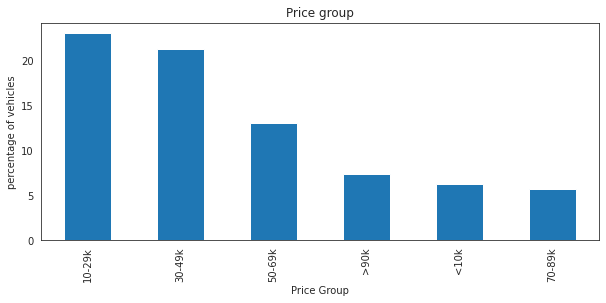

In [46]:
(df['price_group'].value_counts() / len(df) *80).plot.bar(figsize=(10,4))
plt.title("Price group")
plt.ylabel('percentage of vehicles')
plt.xlabel('Price Group');

# 9. Base ML model

In [47]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [48]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

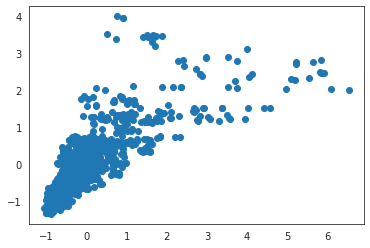

In [51]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

In [52]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.37017209935795214
Root Mean Squared Error: 0.6003890102078514
R2 Score: 0.6087013723890833


# 10. Spot checking algorithms

In [53]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

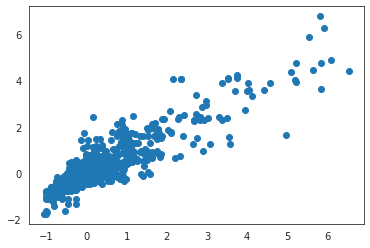

In [54]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

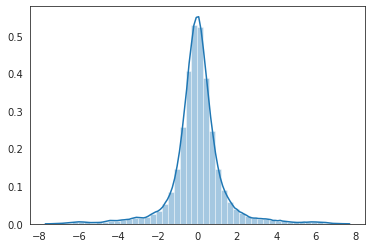

In [60]:
sns.distplot((y_test-y_pred),bins=50)

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.2584995461494527
Root Mean Squared Error: 0.4035222688319885
R2 Score: 0.8232424920390805


In [56]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

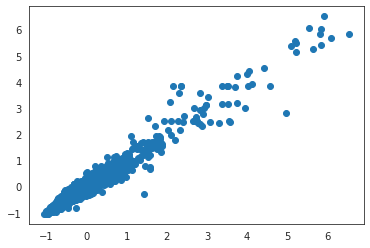

In [57]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

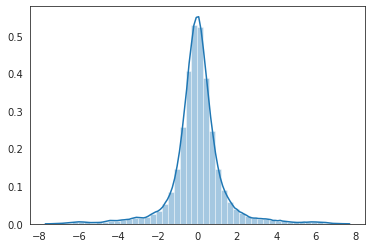

In [58]:
sns.distplot((y_test-y_pred),bins=50)

In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.14138393256425863
Root Mean Squared Error: 0.21606560560707025
R2 Score: 0.94932262221605


# Coclusion

The role of this notebook is to present a way of doing data mining. It's not perfect and not always very relevant, but I try to make my work as clear as possible and present small analyses to help me progress in my reasoning.